<a href="https://colab.research.google.com/github/evegat/usm2025-1-dip-ia-edu-v2-evegat/blob/main/Proyecto/04preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 2: Análisis, preprocesamiento y exploración del dataset


En este notebook (`03analisis.ipynb`) realizo un análisis exploratorio del dataset procesado en el hito anterior. El objetivo es conocer mejor las variables, su tipo de datos, valores más comunes, detectar nulos, revisar su distribución y visualizar patrones que pueden influir en decisiones futuras de modelado.

Se aplican estadísticas descriptivas, gráficos, revisión de outliers y correlaciones entre variables numéricas.


In [1]:
# Conexión al dataset procesado (desde GitHub)

import pandas as pd

# Cargar archivo comprimido desde el repositorio personal en GitHub
url = 'https://github.com/evegat/usm2025-1-dip-ia-edu-v2-evegat/raw/main/Proyecto/01database.csv.gz'
df = pd.read_csv(url, compression='gzip')

# Confirmar carga
print(f"Datos cargados correctamente: {df.shape[0]:,} filas, {df.shape[1]} columnas")


Datos cargados correctamente: 1,521,923 filas, 17 columnas


## Análisis descriptivo de los datos

En esta sección se revisan las primeras filas del dataset, su forma general, tipos de datos y la presencia de valores nulos. Esto permite verificar si la estructura es correcta y si hay campos que requieren limpieza adicional.


In [2]:
# Primeras filas del dataset
df.head()


,cat_periodo,gen_alu,rango_edad,anio_ing_carr_act,tipo_inst_1,modalidad,jornada,region_sede,nivel_carrera_1,requisito_ingreso,valor_matricula,valor_arancel,acreditada_carr,acreditada_inst,forma_ingreso,AGNO_ORIGEN,nomb_carrera
0,2023,1,15 a 19 años,2023,Universidades,Presencial,Diurno,Arica y Parinacota,Profesional Con Licenciatura,Educación Media,188000.0,3519000.0,ACREDITADA,ACREDITADA,1- Ingreso Directo (regular),2023,PEDAGOGIA EN HISTORIA Y GEOGRAFIA
1,2024,2,30 a 34 años,2024,Universidades,Presencial,Vespertino,Biobío,Profesional Con Licenciatura,Técnico de Nivel Superior,126000.0,2753000.0,NO ACREDITADA,ACREDITADA,1- Ingreso Directo (regular),2024,CONTADOR PUBLICO Y AUDITOR
2,2024,1,20 a 24 años,2019,Universidades,Presencial,Diurno,Coquimbo,Profesional Con Licenciatura,Educación Media,209100.0,3928000.0,NO ACREDITADA,ACREDITADA,1- Ingreso Directo (regular),2024,INGENIERIA CIVIL DE MINAS
3,2023,1,40 y más años,2022,Institutos Profesionales,No Presencial,A Distancia,Metropolitana,Profesional Sin Licenciatura,Educación Media,100000.0,1990000.0,NO ACREDITADA,ACREDITADA,1- Ingreso Directo (regular),2023,INGENIERIA INDUSTRIAL
4,2023,1,15 a 19 años,2023,Institutos Profesionales,Presencial,Diurno,Biobío,Profesional Sin Licenciatura,Educación Media,258000.0,2710000.0,NO ACREDITADA,ACREDITADA,1- Ingreso Directo (regular),2023,RELACIONES PUBLICAS MENCION MARKETING


In [3]:
# Dimensiones generales
df.shape


(1521923, 17)

In [4]:
# Información detallada: tipos de datos, nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521923 entries, 0 to 1521922
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cat_periodo        1521923 non-null  int64  
 1   gen_alu            1521923 non-null  int64  
 2   rango_edad         1521923 non-null  object 
 3   anio_ing_carr_act  1521923 non-null  int64  
 4   tipo_inst_1        1521923 non-null  object 
 5   modalidad          1521923 non-null  object 
 6   jornada            1521923 non-null  object 
 7   region_sede        1521923 non-null  object 
 8   nivel_carrera_1    1521923 non-null  object 
 9   requisito_ingreso  1521923 non-null  object 
 10  valor_matricula    1521902 non-null  float64
 11  valor_arancel      1521902 non-null  float64
 12  acreditada_carr    1521923 non-null  object 
 13  acreditada_inst    1521923 non-null  object 
 14  forma_ingreso      1521923 non-null  object 
 15  AGNO_ORIGEN        1521923 non-n

In [5]:
# Estadísticas para columnas numéricas
df.describe()


,cat_periodo,gen_alu,anio_ing_carr_act,valor_matricula,valor_arancel,AGNO_ORIGEN
count,1.521923e+06,1.521923e+06,1.521923e+06,1.521902e+06,1.521902e+06,1.521923e+06
mean,2.023509e+03,1.522258e+00,2.021513e+03,2.420944e+05,4.184945e+06,2.023509e+03
std,4.999268e-01,4.995045e-01,2.071217e+00,1.461310e+05,1.896468e+06,4.999268e-01
min,2.023000e+03,1.000000e+00,1.987000e+03,0.000000e+00,0.000000e+00,2.023000e+03
25%,2.023000e+03,1.000000e+00,2.020000e+03,1.675000e+05,2.850000e+06,2.023000e+03
50%,2.024000e+03,2.000000e+00,2.022000e+03,2.080000e+05,4.105200e+06,2.024000e+03
75%,2.024000e+03,2.000000e+00,2.023000e+03,2.820000e+05,5.479000e+06,2.024000e+03
max,2.024000e+03,2.000000e+00,2.024000e+03,1.059000e+06,1.060830e+07,2.024000e+03


In [6]:
# Conteo de valores nulos por columna
df.isnull().sum()


,0
cat_periodo,0
gen_alu,0
rango_edad,0
anio_ing_carr_act,0
tipo_inst_1,0
modalidad,0
jornada,0
region_sede,0
nivel_carrera_1,0
requisito_ingreso,0


In [7]:
# Porcentaje de nulos por columna
(df.isnull().sum() * 100 / len(df)).round(2)


,0
cat_periodo,0.0
gen_alu,0.0
rango_edad,0.0
anio_ing_carr_act,0.0
tipo_inst_1,0.0
modalidad,0.0
jornada,0.0
region_sede,0.0
nivel_carrera_1,0.0
requisito_ingreso,0.0


In [8]:
# Valores más comunes (moda)
df.mode().iloc[0]


,0
cat_periodo,2024
gen_alu,2
rango_edad,20 a 24 años
anio_ing_carr_act,2023
tipo_inst_1,Universidades
modalidad,Presencial
jornada,Diurno
region_sede,Metropolitana
nivel_carrera_1,Profesional Con Licenciatura
requisito_ingreso,Educación Media


## Visualización de variables numéricas (boxplots)

Los siguientes gráficos ayudan a detectar valores extremos en variables numéricas, como arancel o matrícula. Esto es útil para definir estrategias de limpieza o normalización.


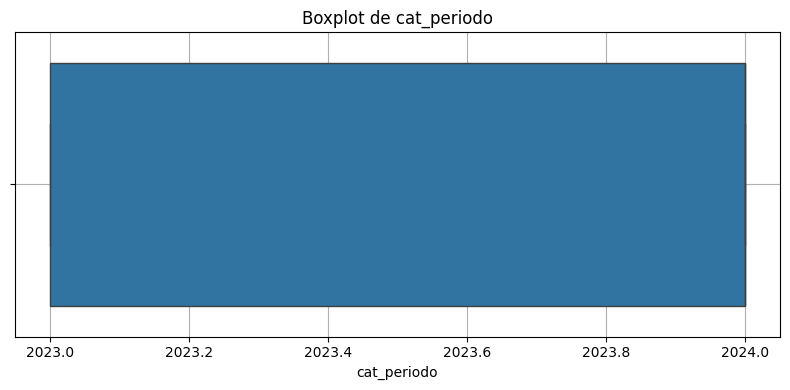

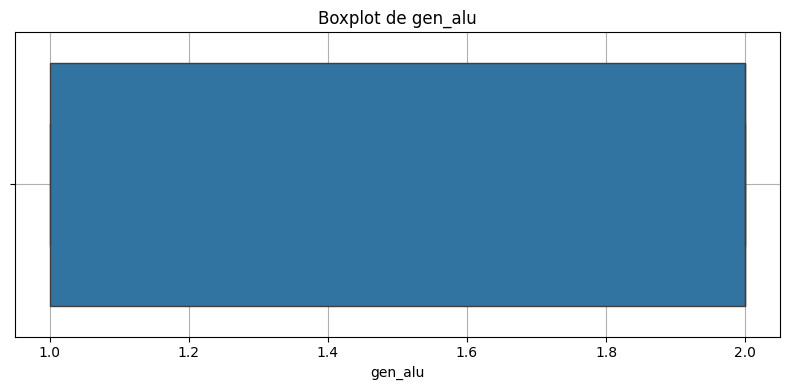

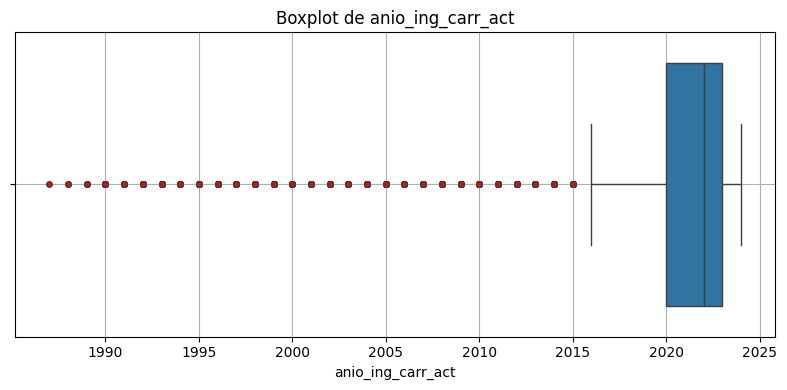

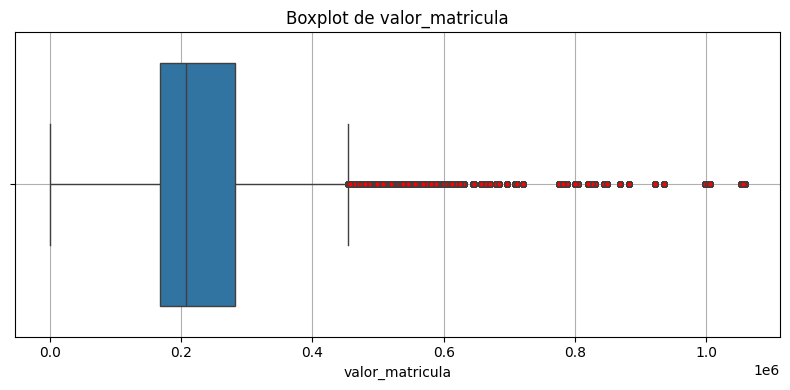

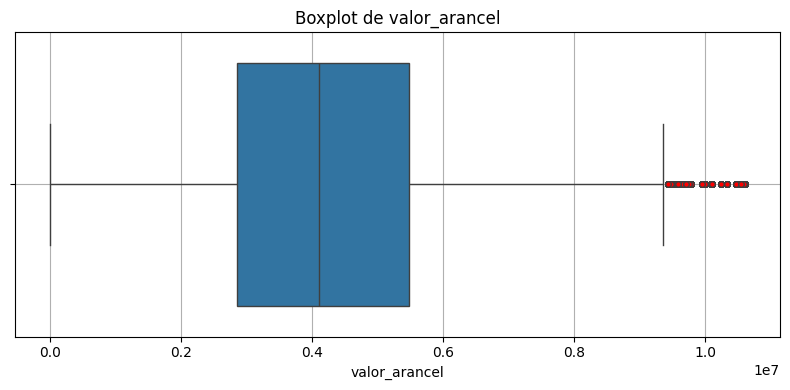

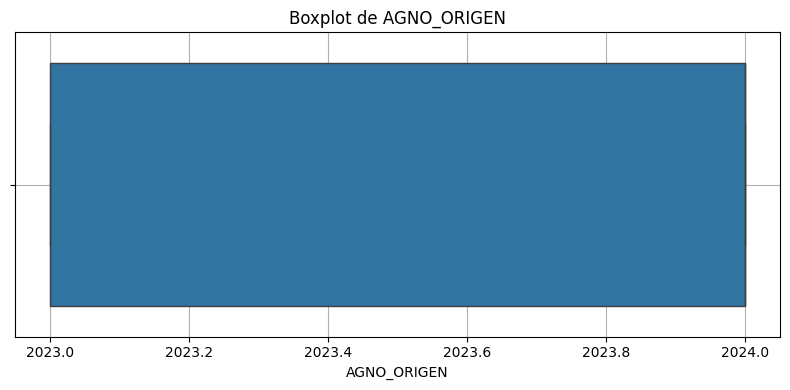

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Estilo de outliers
outlier_style = dict(marker='o', markerfacecolor='red', markersize=4, linestyle='none')

# Generar boxplots por cada variable numérica
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], flierprops=outlier_style)
    plt.title(f'Boxplot de {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Matriz de correlación

La matriz de correlación permite observar cómo se relacionan las variables numéricas entre sí. Valores cercanos a 1 o -1 indican una relación fuerte.


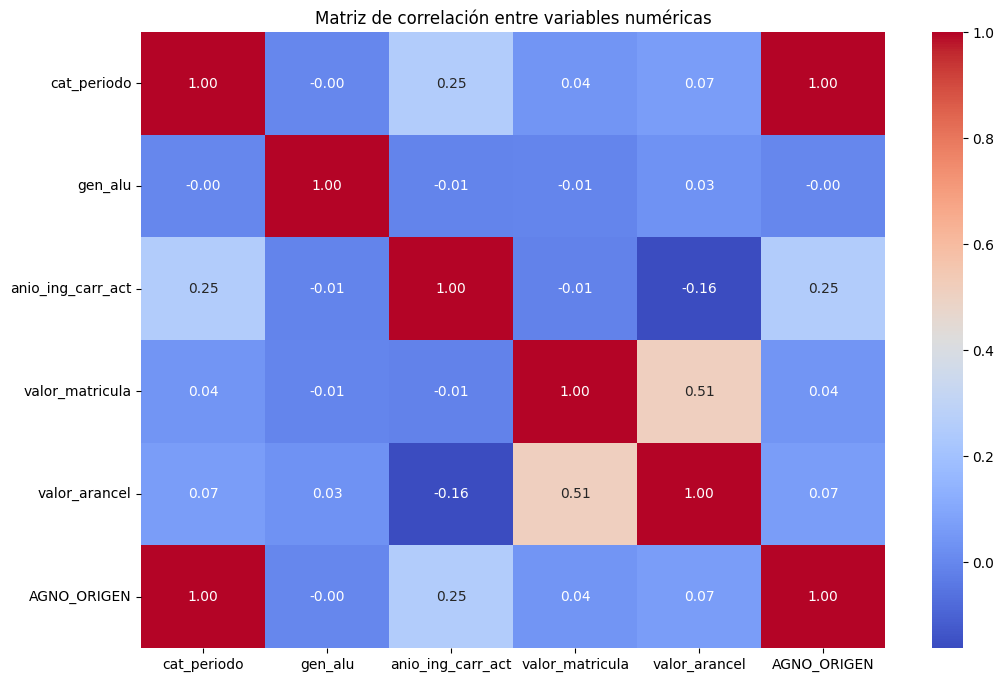

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


### 🔍 Interpretación de la matriz de correlación

La matriz de correlación permite observar la relación lineal entre variables numéricas del dataset. A continuación se destacan algunas observaciones clave:

- **`valor_matricula` y `valor_arancel`** presentan una **correlación positiva moderada (0.51)**. Esto indica que en general, cuando aumenta el valor del arancel, también tiende a aumentar el valor de la matrícula. Es coherente, ya que ambos reflejan componentes del costo total de estudiar.
  
- **`anio_ing_carr_act` y `AGNO_ORIGEN`** tienen una correlación débil positiva (0.25), lo que sugiere cierta relación entre el año en que el estudiante ingresó y el año en que se registró la información. No es perfecta, probablemente por la existencia de estudiantes con trayectorias atípicas.

- **`valor_arancel` y `anio_ing_carr_act`** muestran una **correlación negativa leve (-0.16)**. Esto puede sugerir que ciertos aranceles tienden a ser más altos en cohortes anteriores o más recientes, aunque la relación es débil.

- **`gen_alu` (género)** no presenta correlación significativa con ninguna variable numérica, lo que indica que no hay relación lineal entre el género del estudiante y otras variables como costos o año de ingreso.

En general, **no se observan correlaciones fuertes** entre las variables numéricas, lo que sugiere que no hay redundancia directa entre ellas y que cada variable aporta información propia al análisis.


## Distribución de variables categóricas

En esta sección se visualiza la frecuencia de algunas variables categóricas clave, como región, tipo de institución o forma de ingreso. Esto permite entender qué categorías son predominantes y si hay desequilibrios.


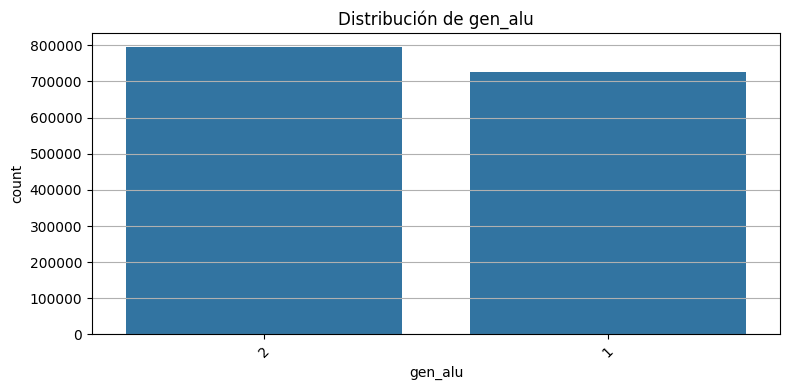

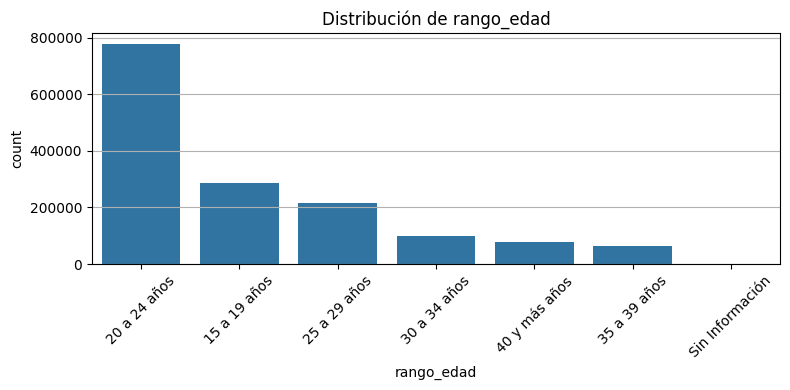

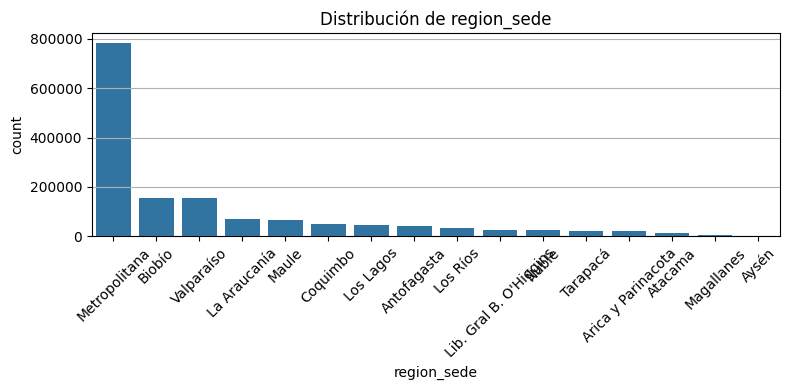

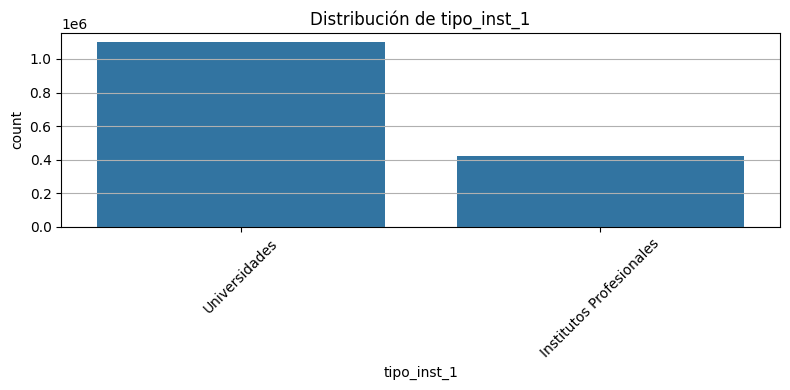

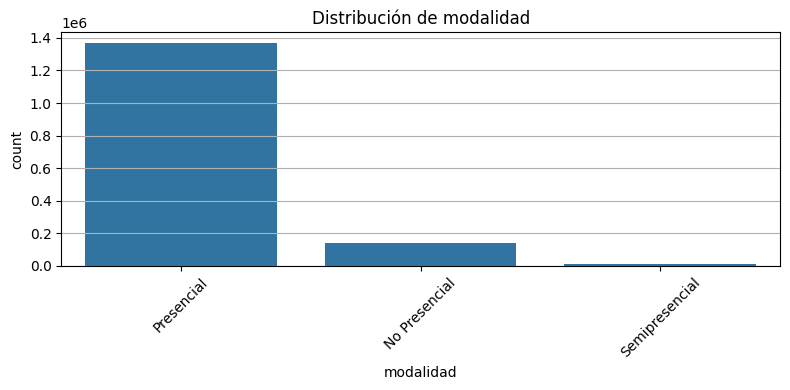

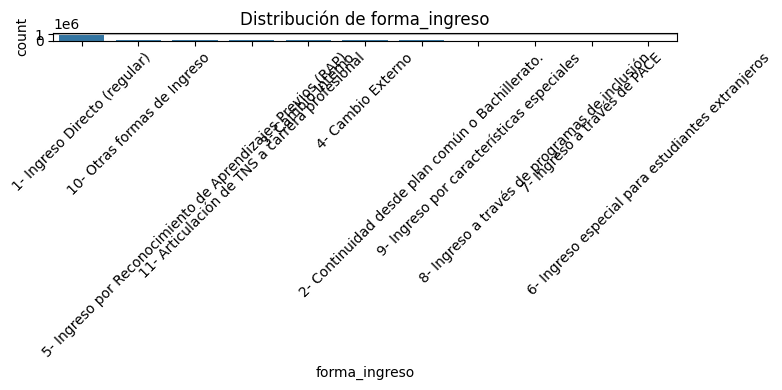

In [11]:
columnas_categoricas = [
    'gen_alu', 'rango_edad', 'region_sede',
    'tipo_inst_1', 'modalidad', 'forma_ingreso'
]

for col in columnas_categoricas:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
